In [94]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
from PIL import Image, ImageFile
import io
import nltk
from nltk import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df = pd.read_csv("fashion_dataset2.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2878 non-null   int64 
 1   PID         2878 non-null   object
 2   GENDER      2878 non-null   object
 3   TITLE       2878 non-null   object
 4   CATEGORY    2878 non-null   object
 5   TAG         2878 non-null   object
 6   LINK        2878 non-null   object
dtypes: int64(1), object(6)
memory usage: 157.5+ KB


In [134]:
df

Unnamed: 0           PID GENDER       TITLE        CATEGORY  \
0              0    Men-ame001    Men     와이드한 매력  americancasual   
1              1    Men-ame002    Men      시티보이 룩  americancasual   
2              2    Men-ame003    Men     빈티지한 색감  americancasual   
3              3    Men-ame004    Men      강렬한 색감  americancasual   
4              4    Men-ame005    Men      빈티지 무드  americancasual   
...          ...           ...    ...         ...             ...   
2873        2873  Women-str296  Women     트렌디한 셋업          street   
2874        2874  Women-str297  Women       패셔니스타          street   
2875        2875  Women-str298  Women       핑크 홀릭          street   
2876        2876  Women-str299  Women     스타일리시해!          street   
2877        2877  Women-str300  Women  강추위도 문제없어!          street   

                                                    TAG  \
0     ['봄', '아메리칸 캐주얼', '가든익스프레스', '갤럭시', '기타 상의', '...   
1     ['봄', '아메리칸 캐주얼', '갤럭시', '데님 팬츠', '로맨틱크라운', '블...   
2     ['봄', '아메리칸 캐주얼', '논픽', '부츠', '블런드스톤', '블루멀', ...   
3     ['겨울', '아메리칸 캐주얼', '레더', '스웨이드', '컬러포인트', '비비드...   
4     ['봄', '아메리칸 캐주얼', '더블유엠씨', '디미토', '디미트리블랙', '메...   
...                                                 ...   
2873  ['셋업코디', '트위드', '오버핏', '레이어드룩', '모노톤', '럭셔리', ...   
2874  ['한파', '플리스', '그래픽', '부츠컷', '유니크', '스트링', '가을'...   
2875  ['톤온톤', '컬러블록', '셋업코디', '벨루어', '로고플레이', '파스텔',...   
2876  ['레오퍼드', '유니크', '셋업코디', '파스텔', '앙고라', '퍼', '로고...   
2877  ['그래픽', '로고플레이', '키높이', '오버핏', '레더', '크롭', '가을...   

                                                   LINK  
0     https://image.msscdn.net/images/style/list/l_3...  
1     https://image.msscdn.net/images/style/list/l_3...  
2     https://image.msscdn.net/images/style/list/l_3...  
3     https://image.msscdn.net/images/style/list/l_3...  
4     https://image.msscdn.net/images/style/list/l_3...  
...                                                 ...  
2873  https://image.msscdn.net/images/style/list/l_3...  
2874  https://image.msscdn.net/images/style/list/l_3...  
2875  https://image.msscdn.net/images/style/list/l_3...  
2876  https://image.msscdn.net/images/style/list/l_3...  
2877  https://image.msscdn.net/images/style/list/l_3...  

[2878 rows x 7 columns]

### Tag에 나오는 term을 dictionary에 추가하기

In [18]:
import re

In [98]:
dictionary = []
contents = []

for i in range(len(df)):
    # print(len(df.iloc[i]['TAG']))
    tags = df.iloc[i]['TAG'][1:len(df.iloc[i]['TAG'])-1]
    # print(tags)
    # print()
    
    tags = re.split("[:/ ,']+", tags)
    tags.remove('')
    dictionary.extend(tags)
    contents.append((df.iloc[i]['PID'], tags))

dictionary = list(set(dictionary))
print('len of dictionary : ', len(dictionary))
dictionary.sort()

len of dictionary :  2530


In [ ]:
if '' in dictionary:
    dictionary.remove('')
dictionary = dictionary[1:]

In [99]:
from konlpy.tag import Okt, Komoran
from nltk import sent_tokenize, word_tokenize

In [109]:
dict_post = {}
for term in dictionary:
    
    posting = {}
    
    for id , t1 in contents:
        # print(idx, tags)    
        freq = 0
        for t2 in t1:
            if (term == t2):
                print("ID : ", id, "Term : ", term, " Word : ", t2) 
                freq += 1
        if (freq != 0):
            posting[id] = freq
    
    dict_post[term] = posting
    print(term)    

ID :  Men-ame083 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-ame166 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas040 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas125 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas131 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas149 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas150 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas157 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas254 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-cas276 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-dan186 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-spo080 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-spo086 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str081 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str083 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str089 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str139 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str152 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-str156 Term :  1993스튜디오  Word :  1993스튜디오
ID :  Men-st

### tf-idf 적용하기

In [120]:
dict_post['봄']

{'Men-ame001': 1,
 'Men-ame002': 1,
 'Men-ame003': 1,
 'Men-ame005': 1,
 'Men-ame113': 1,
 'Men-ame114': 1,
 'Men-ame115': 1,
 'Men-ame116': 1,
 'Men-ame117': 1,
 'Men-ame118': 1,
 'Men-ame119': 1,
 'Men-ame120': 1,
 'Men-ame121': 1,
 'Men-ame122': 1,
 'Men-ame123': 1,
 'Men-ame124': 1,
 'Men-ame125': 1,
 'Men-ame126': 1,
 'Men-ame127': 1,
 'Men-ame128': 1,
 'Men-ame129': 1,
 'Men-ame130': 1,
 'Men-ame131': 1,
 'Men-ame132': 1,
 'Men-ame133': 1,
 'Men-ame134': 1,
 'Men-ame135': 1,
 'Men-ame136': 1,
 'Men-ame137': 1,
 'Men-ame138': 1,
 'Men-ame139': 1,
 'Men-ame140': 1,
 'Men-ame141': 1,
 'Men-ame142': 1,
 'Men-ame143': 1,
 'Men-ame144': 1,
 'Men-ame145': 1,
 'Men-ame146': 1,
 'Men-ame147': 1,
 'Men-ame148': 1,
 'Men-ame149': 1,
 'Men-cas001': 1,
 'Men-cas002': 1,
 'Men-cas005': 1,
 'Men-cas007': 1,
 'Men-cas008': 1,
 'Men-cas009': 1,
 'Men-cas010': 1,
 'Men-cas011': 1,
 'Men-cas012': 1,
 'Men-dan001': 1,
 'Men-dan002': 1,
 'Men-dan003': 1,
 'Men-dan004': 1,
 'Men-dan005': 1,
 'Men-dan0

In [113]:
from math import log10
N = len(df)

def tf(t, d):
    if d in dict_post[t]:
        return 1+log10(dict_post[t][d])
    else:
        return 0

def idf(t):
    df = len(dict_post[t])
    return log10(N/(df))

def tfidf(t, d):
    return tf(t,d)* idf(t)

### tf-idf 기반 score 계산하기 및 문서 결과 보여주기

In [130]:
query = input("Query : ")
tr_query = query.split(" ")
print(tr_query)

['아메카지', '얼죽코', '구두', '리끌로우', '슈페너']


In [131]:
result = []
scores = []
max_score = 0

for product in range(len(df)):
    score = 0
    for term in tr_query:
        if term in dictionary:
            # print(df.iloc[product]['PID'], ' : ', term)
            score += tfidf(term, df.iloc[product]['PID'])
            # print(score)
        else:
            pass
    scores.append((score, df.iloc[product]['PID']))
    
    if (score > 0):
        result.append((score, df.iloc[product]['PID']))

    if score > max_score:
        max_score = score
        
result.sort(reverse=True)
# print(result)

In [135]:
n_count = 0
show_result = []

for r in result:
    if r[0] == max_score:
        show_result.append(r)
        n_count += 1
    elif n_count < 5:
        show_result.append(r)
        n_count += 1
    else:
        break

print(show_result)

[(6.210636781301316, 'Men-ame021'), (5.809062487974185, 'Men-for006'), (4.353605983028693, 'Men-ame011'), (4.060849082769904, 'Men-dan062'), (3.9520316897015606, 'Men-dan072')]


In [137]:
from PIL import Image
import urllib.request
import time
from io import BytesIO

In [143]:
result_img = []
for r in show_result:
    score, id = r[0], r[1]
    for i in range(len(df)):
        if df.iloc[i]['PID'] == id:
            result_img.append(df.iloc[i]['file_loc'])

result_img

['fashion_dataset/americancasual/americancasual_Men_021.jpg',
 'fashion_dataset/formal/formal_Men_006.jpg',
 'fashion_dataset/americancasual/americancasual_Men_011.jpg',
 'fashion_dataset/dandy/dandy_Men_062.jpg',
 'fashion_dataset/dandy/dandy_Men_072.jpg']

Search Keywords :  ['아메카지', '얼죽코', '구두', '리끌로우', '슈페너']  에 대한 키워드 매칭 검색 결과 입니다.


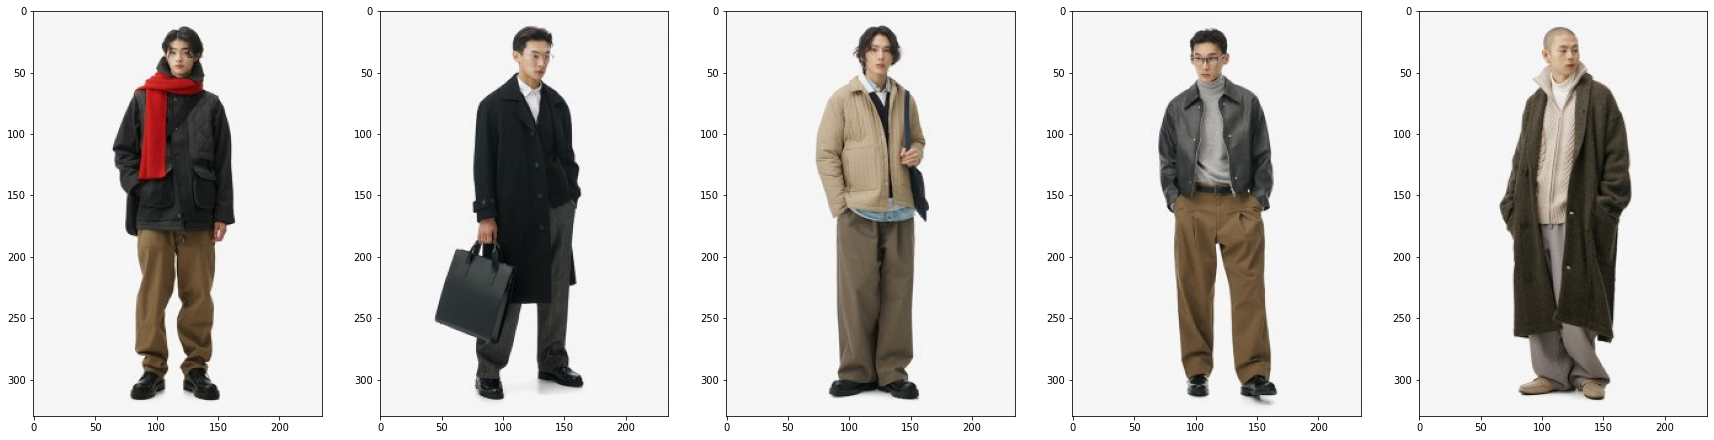

In [147]:
print("Search Keywords : " , tr_query , " 에 대한 키워드 매칭 검색 결과 입니다.")
fig = plt.figure(figsize=(30,10))

for n in range(len(result_img)):
    fig.add_subplot(1,len(result_img), n+1)
    orig_img = Image.open(result_img[n])
    plt.imshow(orig_img)